# Burgers' Equation Example

In this notebook we show how to use the PDE solver to solve Burgers' equation in 1D.

Burgers' equation in 1D is
$$
\frac{\partial u}{\partial t} = u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2},
$$
where $u(x, t)$ is some field with viscosity $\nu$.

We will solve this in a time-stepping approach with an implicit Euler method.

Let's import the required packages:

In [ ]:
import jax.numpy as jnp
from matplotlib import pyplot as plt
import jax_fno.solvers as solve_ivp

Now, let's solve the Burgers' equation with Dirichlet boundary conditions.

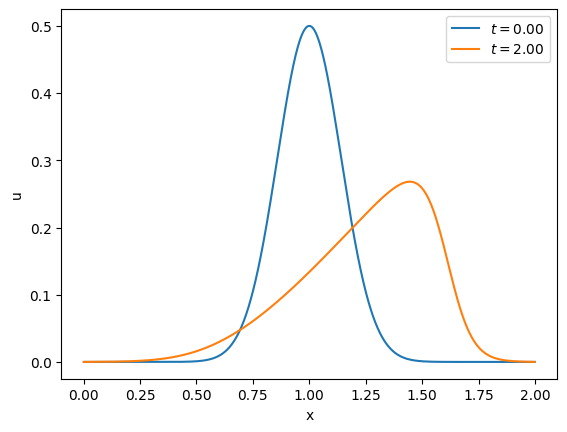

In [2]:
# Solve Burgers' equation with Dirichlet BCs
# Create boundary condition with 0 as the left and right boundary values
bc_type = solve_ivp.BCType.DIRICHLET
bc_values = (0.0, 0.0)

# Viscosity
nu = 0.01

# Define PDE parameters
params = {
    'nu': nu,
    'bc_type': bc_type,
    'bc_left': bc_values[0],
    'bc_right': bc_values[1]
    }

# Load pre-defined functions for the Burgers' equation
# Users have to write their own functions to use the solver for other equations
residual_fn = solve_ivp.burgers_residual_1d
jvp_fn = solve_ivp.burgers_jvp_1d
# jvp_fn = None

# Set up grid
L = 2.0  # Domain length
nx = 2048  # Number of spatial points in the interior
x = solve_ivp.create_uniform_grid(L, nx, bc_type)

# Time parameters
t_span = (0.0, 2.0)

# Create Gaussian initial condition
center=1.0
width=0.2
amplitude=0.5
gaussian_ic = lambda x: amplitude * jnp.exp(-((x - center) / width) ** 2)
u0 = gaussian_ic(x)

# Solve the equation
t, u_dirichlet = solve_ivp.solve(u0, t_span, L, residual_fn, params, jvp_fn=jvp_fn, dt=1e-3)

# Plot the solution
fig, ax = plt.subplots()
ax.plot(x, u_dirichlet[0, :], label=f'$t={t[0]:.2f}$')
ax.plot(x, u_dirichlet[-1, :], label=f'$t={t[-1]:.2f}$')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend();

Great! Now, let's solve the same equation with periodic boundary conditions instead. Notice that the initial condition is different.

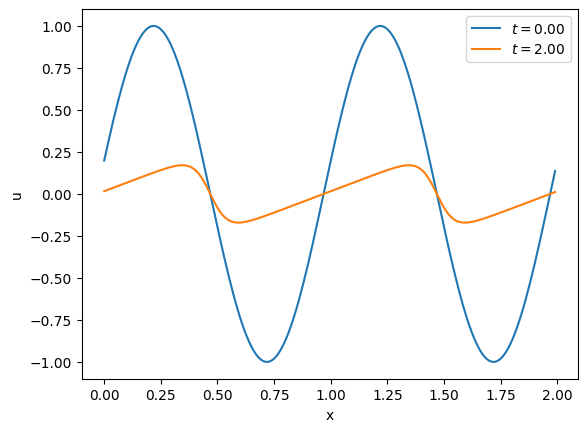

In [3]:
# Solve Burgers' equation with Periodic BCs

# Create boundary condition with 0 as the left and right boundary values
bc_type = solve_ivp.BCType.PERIODIC

# Viscosity
nu = 0.01

# Define PDE parameters
params = {'nu': nu, 'bc_type': bc_type, 'bc_left': 0.0, 'bc_right': 0.0}

# Set up grid
L = 2.0  # Domain length
nx = 200  # Number of spatial points in the interior
x = solve_ivp.create_uniform_grid(L, nx, bc_type)

# Load pre-defined functions for the Burgers' equation
# Users have to write their own functions to use the solver for other equations
residual_fn = solve_ivp.burgers_residual_1d

# Time parameters
t_span = (0.0, 2.0)

# Create Gaussian initial condition
amplitude=1.0
frequency=2.0
phase=0.2
sine_ic = lambda x: amplitude * jnp.sin(frequency * jnp.pi * x + phase)
u0 = sine_ic(x)

# Solve the equation
t, u_periodic = solve_ivp.solve(u0, t_span, L, residual_fn, params, jvp_fn=solve_ivp.burgers_jvp_1d, dt=0.1)

fig, ax = plt.subplots()
ax.plot(x, u_periodic[0, :], label=f'$t={t[0]:.2f}$')
ax.plot(x, u_periodic[-1, :], label=f'$t={t[-1]:.2f}$')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend();